# Final Project of Social Data Analysis

## 1 Motivation

### 1.1 The Eviction Data

The dataset consists of Pending, scheduled, and executed evictions within the five boroughs from 2017. Moreover, there are 20 columns in the dataset containing Eviction postcode, Eviction address, Latitude, Longitude, Court Index Number, BOROUGH, Council District and so forth.

### 1.2 Why we choose this dataset

From 2017 to the present, there is a changing amount of evictions in New York. Over 19,000 tenants of apartments experienced an eviction from their homes in 2018.  In particular, during the period of COVID-19 in 2020, of the 50,106 evictions in New York since March 15th, 17,293 were filed in Bronx County, 13,553 were filed in Kings County, 9,428 were filed in New York County, 8,901 were filed in Queens County, and 931 were filed in Richmond County.

As shown in the figure below, we can see that different borough has different GDP, population, land area and density. Are these indices related to evictions that happened in different boroughs? Does other information such as latitude and longitude have a relationship with evictions? What are the deeper causes of the phenomenon of eviction surge? These fascinating questions are worthy of our in-depth exploration. 

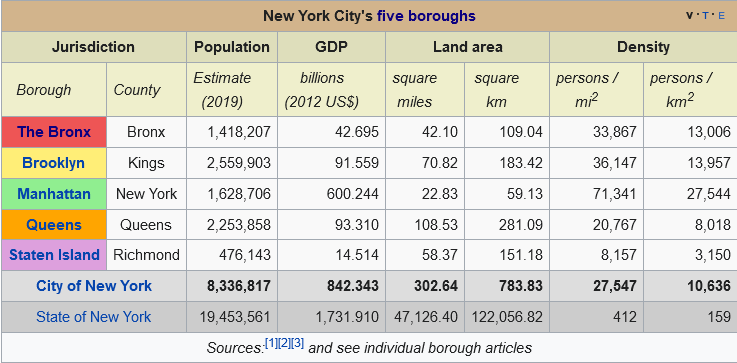

### 1.3 The goal of our data analysis

In the first place, we would like to present the informative statistics of the dataset, such as the number of evictions in each borough, so that users can get a deeper insight into the eviction data.  Secondly, the primary purpose of the analysis is to get the reasons for the fluctuated amount of evictions. The process may be complex because there are many factors related.  Finally,  visualizing the results is imperative for users to obtain a better understanding of eviction data. 

## 2 Preliminary data wrangling, cleaning and basic statistics

In this part, we would like to prepare for the subsequent
data analysis. Moreover,  we will do some basic statistics in order to get a basic understanding of the datasets.  

### 2.1 Import libraries and load datasets

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi

import json
from urllib.request import urlopen
import plotly.express as px

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource,FactorRange
from bokeh.layouts import row, column, gridplot
from bokeh.palettes import Category20c, Category20
from bokeh.models.widgets import Tabs, Panel
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues4, Blues5
from bokeh.transform import cumsum
from bokeh.models import Legend,HoverTool
from bokeh.palettes import brewer

In [2]:
ev = pd.read_csv('Evictions.csv')
propValue = pd.read_csv('Revised_Notice_of_Property_Value__RNOPV_.csv')
demographics = pd.read_excel('DemographicsNY.xlsx',engine='openpyxl', header=[0], index_col=[0])

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 2.2 Data wrangling and cleaning

In [3]:
# Drop all rows that contain any NaN values
ev = ev.dropna(axis=0,how='any')

In [4]:
# We select the data from 2017 to 2020
ev["Executed Date"] = pd.to_datetime(ev["Executed Date"])
ev = ev[ev["Executed Date"].dt.year < 2021]
ev["Executed Date"].dt.year.value_counts()

2017    18096
2018    17257
2019    14745
2020     2685
Name: Executed Date, dtype: int64

### 2.3 Basic Statistics

In [5]:
# The description of columns: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4 
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52783 entries, 0 to 66400
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Court Index Number         52783 non-null  object        
 1   Docket Number              52783 non-null  int64         
 2   Eviction Address           52783 non-null  object        
 3   Eviction Apartment Number  52783 non-null  object        
 4   Executed Date              52783 non-null  datetime64[ns]
 5   Marshal First Name         52783 non-null  object        
 6   Marshal Last Name          52783 non-null  object        
 7   Residential/Commercial     52783 non-null  object        
 8   BOROUGH                    52783 non-null  object        
 9   Eviction Postcode          52783 non-null  int64         
 10  Ejectment                  52783 non-null  object        
 11  Eviction/Legal Possession  52783 non-null  object        
 12  Lati

In [6]:
ev.describe()

,Docket Number,Eviction Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,52783.000000,52783.000000,52783.000000,52783.000000,52783.000000,52783.000000,52783.000000,5.278300e+04,5.278300e+04
mean,173879.482011,10739.318227,40.759795,-73.910618,7.901105,22.897278,8549.202736,2.578219e+06,2.506974e+09
std,153667.502728,500.035399,0.091338,0.061220,4.501348,13.679437,21262.935381,1.064304e+06,1.010790e+09
min,693.000000,10000.000000,40.505414,-74.251262,1.000000,1.000000,1.000000,1.000000e+06,1.000078e+09
25%,71248.000000,10453.000000,40.674708,-73.944684,4.000000,12.000000,196.000000,2.008103e+06,2.027400e+09
50%,96298.000000,10468.000000,40.771493,-73.911416,7.000000,17.000000,371.000000,2.100131e+06,2.045960e+09
75%,333011.500000,11221.000000,40.841113,-73.878641,12.000000,36.000000,988.000000,3.216044e+06,3.051010e+09
max,496987.000000,11698.000000,40.911588,-73.701430,18.000000,51.000000,157901.000000,5.171959e+06,5.080480e+09


In [7]:
# Correlation Matrix
ev.corr()  

,Docket Number,Eviction Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
Docket Number,1.000000,-0.354418,0.392971,0.055832,-0.088726,-0.364923,-0.007855,-0.348045,-0.342134
Eviction Postcode,-0.354418,1.000000,-0.710590,0.319449,0.261748,0.785692,0.225786,0.858645,0.849583
Latitude,0.392971,-0.710590,1.000000,0.250563,-0.272846,-0.837513,-0.135775,-0.669906,-0.652051
Longitude,0.055832,0.319449,0.250563,1.000000,0.225332,-0.161769,0.281103,0.198975,0.194961
Community Board,-0.088726,0.261748,-0.272846,0.225332,1.000000,0.296203,0.108550,0.086321,0.069186
Council District,-0.364923,0.785692,-0.837513,-0.161769,0.296203,1.000000,0.089058,0.759300,0.754481
Census Tract,-0.007855,0.225786,-0.135775,0.281103,0.108550,0.089058,1.000000,0.222627,0.213841
BIN,-0.348045,0.858645,-0.669906,0.198975,0.086321,0.759300,0.222627,1.000000,0.995795
BBL,-0.342134,0.849583,-0.652051,0.194961,0.069186,0.754481,0.213841,0.995795,1.000000


The dataset contains twenty columns such as Court Index Number, and nine of them are numerical. Form the correlation matrix, we can see that Eviction Postcode, Council District, BIN and BBL have closer relationship as they all contain the information about location. 

## 3 Data Analysis

The third section provides an exposition that places the 
primary emphasis on data analysis, so that we could get more insights into the datasets. From the basic description of the evictions dataset, we 
will explore more information by the council district
that is associated with the provided entity location of 
evictions. Therefore, we use some additional data for our
analysis in order to get better understanding.

Firstly, we would like to sort the data by apartment number to see which apartment
has maximum evictions.

In [8]:
# To get the top-6 apartment where has more evictions 
apartment = ev["Eviction Apartment Number"].value_counts().sort_values(ascending=False)[0:6]
apartment

2            1499
1            1339
3             735
2ND FLOOR     694
BASEMENT      673
2F            661
Name: Eviction Apartment Number, dtype: int64

From the result, we know that the number 1, 2 and 3 apartments has more evictions than others. So it is advisable for corresponding departments to pay more attention to these apartments.

In [9]:
propValue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MAILED DATE                             27312 non-null  object 
 1   BOROCODE                                27312 non-null  int64  
 2   BLOCK                                   27312 non-null  int64  
 3   LOT                                     27312 non-null  int64  
 4   EASE                                    0 non-null      float64
 5   NAME                                    27312 non-null  object 
 6   Address 1                               27312 non-null  object 
 7   Address 2                               27312 non-null  object 
 8   Address 3                               27312 non-null  object 
 9   City, State, Zip                        27311 non-null  object 
 10  Country                                 0 non-null      fl

In [10]:
propValue['Council District '].isnull().sum()
df = propValue[['Council District ','REVISED MARKET VALUE']]
df.dropna(inplace=True)
uni = df['Council District '].unique()

<ipython-input-10-00d2a8c95392>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
mvmean = np.empty(51)
i = 0
for u in uni:
    prop = df[df['Council District '] == u]
    mvmean[i] = prop["REVISED MARKET VALUE"].mean()
    i+=1
numpy_data = np.array([mvmean, uni])
marketValues = pd.DataFrame(data=numpy_data.T, index=numpy_data[1], columns=["Mean Market Value", "Council District"])
marketValues.sort_values(by=["Council District"])

,Mean Market Value,Council District
1.0,2.286479e+06,1.0
2.0,6.036043e+06,2.0
3.0,3.200658e+06,3.0
4.0,6.766708e+06,4.0
5.0,2.434337e+06,5.0
6.0,2.827859e+06,6.0
7.0,5.544365e+06,7.0
8.0,1.426438e+06,8.0
9.0,7.355149e+05,9.0
10.0,1.939328e+06,10.0


Market value is almost more of a measure of public sentiment about a district. We can conclude that the council district
31 has more active finincal market on the grounds that it has
the maximum mean mearket value.

In [12]:
demographics = demographics.T
demographics = demographics[1:]

In [13]:
units = demographics["Occupied Housing Units"]
ev_cd = ev["Council District"].value_counts().sort_index()

In [14]:
units = units.values.tolist()
ev_cd = ev_cd.values.tolist()

In [15]:
rates = []
index_list = []
for i in range(51):
    t = ev_cd[i]/units[i]*1000
    rates.append(t)
    index_list.append("Council District {0}".format(i+1))

In [16]:
ev_rate = pd.DataFrame(rates,index=index_list,columns=['Evictions pr. 1000 housing units'])
ev_rate

,Evictions pr. 1000 housing units
Council District 1,6.616974
Council District 2,7.270754
Council District 3,11.329056
Council District 4,5.964120
Council District 5,5.568989
Council District 6,4.544993
Council District 7,15.192107
Council District 8,30.492083
Council District 9,28.084020
Council District 10,32.521032


## 4 Genre

*Visual narrative* tactics are visual applications which can be used to assist the narrative, which is  further subdivided into three segregated sections: visual structuring, highlighting, and transition guidance. We will introduce the tools that we use for data visualization from each of three categories.  
> - **Visual structuring:** The concept of visual structuring is related to the narrative structure, and it allows viewers to identify their position within the larger organization of the visualization. In this category, we use _Consistent Visual Platform_ as the main tool to present results, which is the common choice of techniques under visual structuring. The user only need to 
change the content within each panel while leaving the general layout of the visual elements intact. Therefore, adopting consistent visual platform is a more
active way between storytellers and viewers.
> - **Highlighting:** Highlighting refers to visual mechanisms that help the viewer rectify particular elements in the display. _Feature Distinction_ is commonly used to visualize data. By this way, users can clearly see what is the
most important features in the visualization.
> - **Transition guidance:** It talks about the techniques for moving within or between visual scenes without confusing the viewer. _Object Continuity_ is a widely-used technique, and it enables the visualization to tell a complete story in a more standard way.

Also, the *narrative structure* tactics is used to assist and facilitate the narrative. We would like to implement this kind of tools from three aspects: ordering, interactivity, and messaging.

> - **Ordering:** _Ordering_ refers to the methods of arranging the path viewers take through the data visualization. _Random Access_ is the way we used on the grounds we will analyze the dataset from different perspectives. 
> - **Interactivity:** _Interactivity_ refers to the different ways a viewer can manipulate the visualization. We visualize the data by implementing _Filtering/Selection/Search so that the users can easily select the specific results of data they want. 
> - **Messaging:** It is a way about visualization communicating theories and commentary to the viewer. _Captions/Headlines_ are adopted in our figures in order to present the main idea or way of the visualization. Therefore, viewers can have better understanding of visualized results.

## 5 Visualizations

We will focus on data visualization and the analysis based on
the results in this part.

In [17]:
# Visualize the amount of evictions in each borough of New York
brug = ev.BOROUGH.value_counts().sort_values(ascending=False)
brug_values = list(brug.values)
brug_names = list(brug.index)

output_notebook()

# Add plot
p = figure(
    y_range = brug_names,
    plot_width = 800,
    plot_height = 600,
    title = 'The amount of evictions in each borough of New York',
    x_axis_label = 'The amount of evictions',
    tools = "pan, box_select, zoom_in, zoom_out, save, reset"
)

# Render glyph
p.hbar(
    y = brug_names,
    right = brug_values,
    left = 0,
    height = 0.4,
    fill_color = Blues5
)

# Show results
show(p)

Loading BokehJS ...

In [18]:
output_notebook()

# Prepare data
data = brug.reset_index(name='value').rename(columns={'index':'borough'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20[len(brug)]

# Add plot
p = figure(plot_height=350, 
           title="The pie chart of evictions in five boroughs ", 
           toolbar_location=None,
           tools="hover", 
           tooltips="@borough: @value", 
           x_range=(-0.5, 1.0)
)

# Plot the pie chart
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='borough', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

Loading BokehJS ...

As shown in the figures above, the number of evictions in the Bronx is maximum. In contrast, evictions of Staten Island have minimum value among five boroughs. 


In [19]:
# Prepare data
Brk = ev[ev["BOROUGH"]=='BROOKLYN']["Executed Date"].dt.year.value_counts().sort_index(ascending=True)
Brx = ev[ev["BOROUGH"]=='BRONX']["Executed Date"].dt.year.value_counts().sort_index(ascending=True)
Mht = ev[ev["BOROUGH"]=='MANHATTAN']["Executed Date"].dt.year.value_counts().sort_index(ascending=True)
StI = ev[ev["BOROUGH"]=='STATEN ISLAND']["Executed Date"].dt.year.value_counts().sort_index(ascending=True)
Qns = ev[ev["BOROUGH"]=='QUEENS']["Executed Date"].dt.year.value_counts().sort_index(ascending=True)

output_notebook()

years = ['2017','2018','2019','2020']
colors = Category20c[5]

# Add plot
p = figure(
    x_range = years,
    plot_width = 800,
    plot_height = 500,
    title = 'The evictions of each borough from 2017 to 2020',
    x_axis_label = 'Year',
    y_axis_label = 'Evictions',
    tools = "pan, box_select, zoom_in, zoom_out, save, reset"
)

# Render glyph
p.vbar(x=years,top=list(Brk.values),width=0.5,color=colors[0],muted_color=colors[0], muted_alpha=0.02,legend_label='BROOKLYN')
p.vbar(x=years,top=list(Brx.values),width=0.5,color=colors[1],muted_color=colors[1], muted_alpha=0.02,legend_label='BRONX')
p.vbar(x=years,top=list(Mht.values),width=0.5,color=colors[2],muted_color=colors[2], muted_alpha=0.02,legend_label='MANHATTAN')
p.vbar(x=years,top=list(StI.values),width=0.5,color=colors[3],muted_color=colors[3], muted_alpha=0.02,legend_label='STATEN ISLAND')
p.vbar(x=years,top=list(Qns.values),width=0.5,color=colors[4],muted_color=colors[4], muted_alpha=0.02,legend_label='QUEENS')


# Legend
p.legend.click_policy='mute'
p.legend.orientation = 'vertical'
p.legend.location = 'top_right'
p.legend.label_text_font_size = '10px'


show(p)

Loading BokehJS ...

Upper figures reveal that from 2017 to 2019, there has been a gradual decline in the number of evictions in four boroughs of New York except Staten Island. However, the quantity of evictions in all areas decreases sharply when it comes to 2020. This is because New York halted all evictions due to the Corona virus pandemic. https://ny.curbed.com/2020/3/16/21180842/coronavirus-new-york-state-eviction-moratorium    

In [20]:
# Prepare the data for drawing box plot
Brk_ = ev[ev["BOROUGH"]=='BROOKLYN']["Executed Date"].value_counts()
Brx_ = ev[ev["BOROUGH"]=='BRONX']["Executed Date"].value_counts()
Mht_ = ev[ev["BOROUGH"]=='MANHATTAN']["Executed Date"].value_counts()
StI_ = ev[ev["BOROUGH"]=='STATEN ISLAND']["Executed Date"].value_counts()
Qns_ = ev[ev["BOROUGH"]=='QUEENS']["Executed Date"].value_counts()
brk = pd.DataFrame([list(Brk_.values),['BROOKLYN']*len(Brk_)]).T
brx = pd.DataFrame([list(Brx_.values),['BRONX']*len(Brx_)]).T
mht = pd.DataFrame([list(Mht_.values),['MANHATTAN']*len(Mht_)]).T
sti = pd.DataFrame([list(StI_.values),['STATEN ISLAND']*len(StI_)]).T
qns = pd.DataFrame([list(Qns_.values),['QUEENS']*len(Qns_)]).T
brghs = pd.concat((brk,brx,mht,sti,qns),axis=0).reset_index(drop=True)
brghs.columns = ['value','borough']
brghs['value'] = pd.to_numeric(brghs['value'])

# Find the quartiles and IQR for each category
cats = ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
groups = brghs.groupby('borough')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# Find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.value > upper.loc[cat]['value']) | (group.value < lower.loc[cat]['value'])]['value']
out = groups.apply(outliers).dropna()

# Prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(
    tools="pan, box_select, zoom_in, zoom_out, save, reset", 
    background_fill_color="#efefef", 
    x_range=cats,
    y_axis_label = 'Evictions in a day',
    x_axis_label = 'Boroughs',
    title = 'The evictions of five boroughs in a day'
)

# If no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.value = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'value']),upper.value)]
lower.value = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'value']),lower.value)]

# Stems
p.segment(cats, upper.value, cats, q3.value, line_color="black")
p.segment(cats, lower.value, cats, q1.value, line_color="black")

# Boxes
p.vbar(cats, 0.7, q2.value, q3.value, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.value, q2.value, fill_color="#3B8686", line_color="black")

# Whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.value, 0.2, 0.01, line_color="black")
p.rect(cats, upper.value, 0.2, 0.01, line_color="black")

# Outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"

output_notebook()

show(p)

Loading BokehJS ...

As described in the boxplot, there are much more evictions happened in the Bronx within a day. In contrast,
the Staten Island has the lower amount of evictions in a day.
Therefore, based on the analysis, we can conclude that
the Bronx is the area where evictions occur most frequently.

## 6 Discussion

Our data analysis and visualization are based on the evictions dataset of New York that lists pending, scheduled, and executed evictions within the five boroughs from 2017 to the present. There are some advantages of the figures shown in the visualization part. First, the visualization has advanced interactivity so that users can easily select the results they are more interested in according to their wishes. Second, to attract the viewer's attention, we try our best to adopt a more beautiful and straightforward way to present the results. Third, we would like to tell the story more in detail. In other words, we would like to include more helpful information in our visualization so the users will save more time in reading. 

However, machine learning is still missing in our data analysis. As can be seen from the information of the dataset, few numerical columns can be used for analysis, and most of them are coding of buildings or location. Therefore, most methods of machine learning are not suitable for the evictions dataset.  If we want to get deeper insights into the evictions data, we have to find more additional data to get supports. Unfortunately, there are no open sources in the database. Also, the ways of visualization are restricted due to the dataset. 

## 7 Contributions